# Common Probability Distributions

This Notebook is an exploration of common probability distributions. These are covered in chapter 3 section 3.9 of Deep Learning by Ian Goodfellow, et al. The following distributions will be covered: 

Bernoulli Distribution  
Multinoully/Categorical Distribution  
Gaussian/Normal Distribution  
Exponential and Laplace Distribution  
The Dirac Distribution and Empirical Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Bernoulli

We will start with the Bernoulli Distribution, which is a discrete distribution over a single binary random variable. For example, a coin toss. The Bernoulli Distribution is defined as follows:

for context, P(x=y) is the probability of an event where P(x=y) = the probability of y occuring

P(x=1) = p  #lowercase p is the probability of success
P(x=0) = 1-p #the probability of failure is 1-p 


This is the probability mass function of the Bernoulli distribution. It is a function that maps from a random variable to a probability, in this case that random variable is x.
P(x=y) = (p^y)(1-p)^(1-y)

The expected value of a Bernoulli distribution is equal to the probability of success. Which is interesting since it is a binary distribution. This means that the expected value is either options, 0 or 1.
E[x] = p

The variance of the probability, which is a measure of how varied the random varables are in the distrubtion is p(1-p). If p is 0.5 that means that the variance is 0.25. This is the highest variance possible for a Bernoulli distribution.
Var[x] = p(1-p)


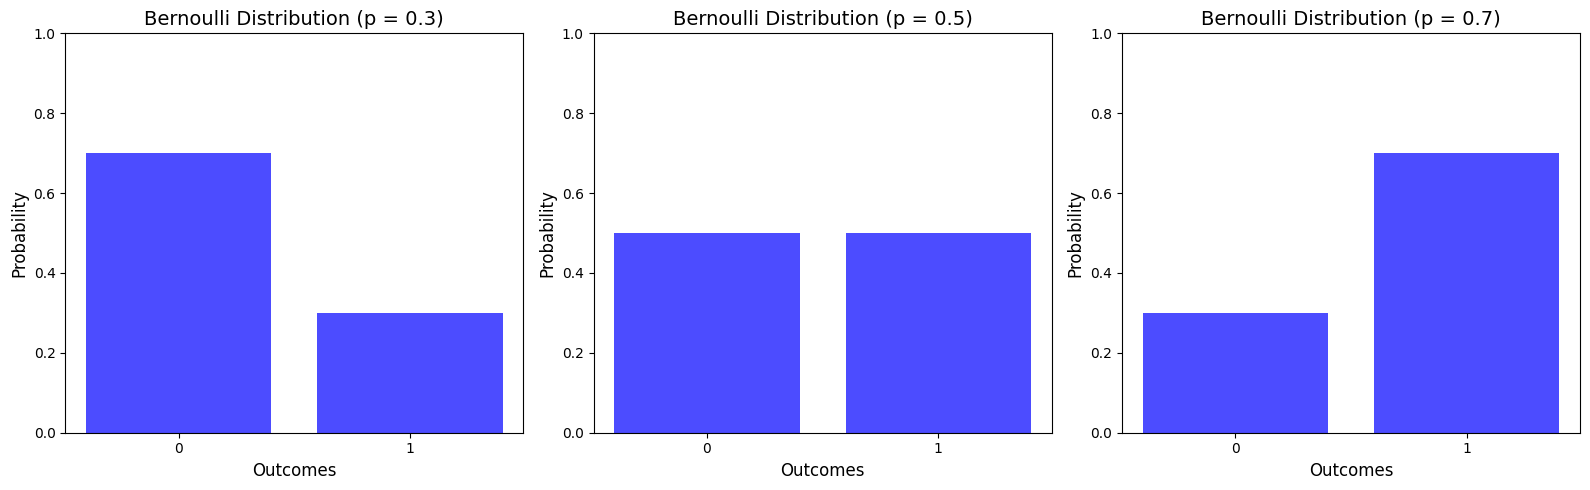

In [13]:
# Defining the Bernoulli distributions
p_values = [0.3, 0.5, 0.7]  # probabilities of success
x = np.arange(2)  # possible outcomes: 0 (failure), 1 (success)

# Create a new figure and set its size
fig, axs = plt.subplots(1, 3, figsize=(16,5))

for i in range(3):
    p = p_values[i]
    bernoulli_dist = stats.bernoulli.pmf(x, p)  # Probability Mass Function

    # Create a bar plot on each subplot
    axs[i].bar(x, bernoulli_dist, color='blue', alpha=0.7)
    axs[i].set_xticks(x)

    # Set the title and labels for each subplot
    axs[i].set_title('Bernoulli Distribution (p = ' + str(p) + ')', fontsize=14)
    axs[i].set_xlabel('Outcomes', fontsize=12)
    axs[i].set_ylabel('Probability', fontsize=12)
    axs[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Multinoulli 

Next we will cover the Multinoulli/Categorical Distribution. It is the distribution of a single discrete variable with a finite number k states. In other words, it is a Bernoulli distribution with more than two possible outcomes. For example, a dice roll. The Multinoulli distribution is defined as follows:

the vector p contains the probability of each of the k states. The probability of k is 1 minus the sum of the probabilities of all the other states. 1 - 1.Tp

Because the Multinoulli distribution is generally used too represent categories, as opposed to numerical values, variance and expected value are not defined for this distribution.

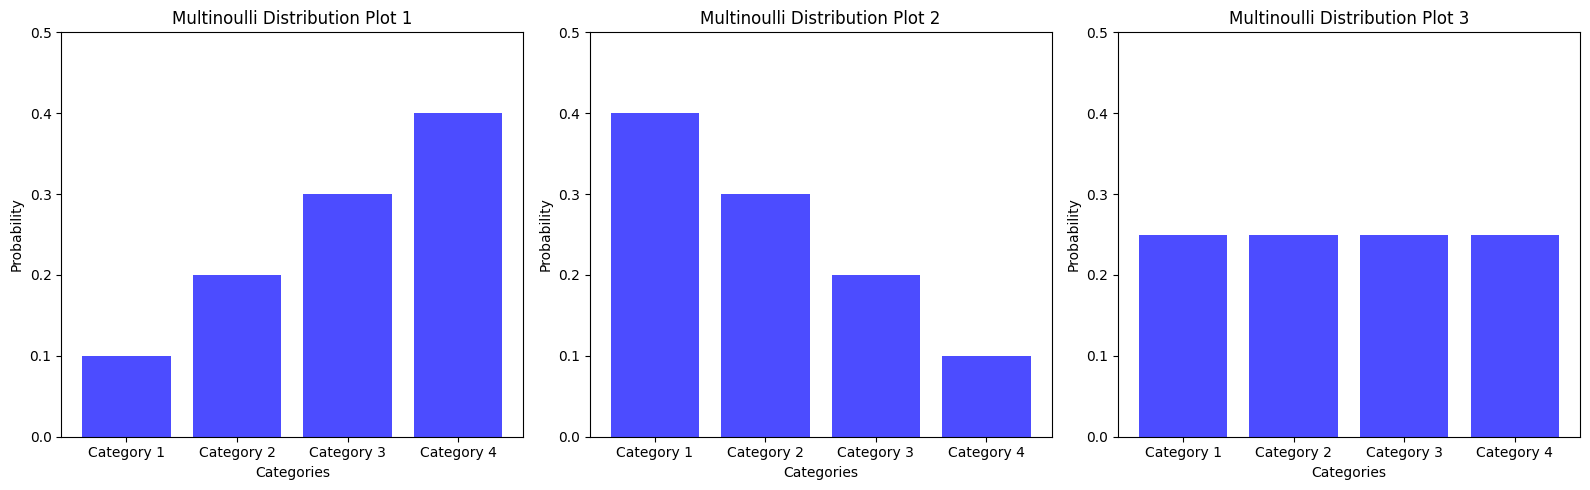

In [10]:
# Probabilities for the three different plots - all add up to 1
p_values = [[0.1, 0.2, 0.3, 0.4], [0.4, 0.3, 0.2, 0.1], [0.25, 0.25, 0.25, 0.25]]
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4']

fig, axs = plt.subplots(1, 3, figsize=(16,5))

for i in range(3):
    # Create a bar plot on each subplot
    axs[i].bar(categories, p_values[i], color='blue', alpha=0.7)

    # Set the title and labels for each subplot
    axs[i].set_title('Multinoulli Distribution Plot ' + str(i+1))
    axs[i].set_xlabel('Categories')
    axs[i].set_ylabel('Probability')
    set_ylim = axs[i].set_ylim([0, 0.5])

plt.tight_layout()
plt.show()

# Gaussian

Next we consider the Gaussian/Normal Distribution.

f(x | μ, σ^2) = 1 / ( sqrt(2πσ^2) ) * exp( -(x-μ)^2 / (2σ^2) )


μ is the mean or expectation of the distribution (and also its median and mode),
μ is where the bell curve is centered.

σ is the standard deviation, which is a measure of how spread out the distribution is.

σ^2 is the variance, 

According to the central limit theorem, the sum of many independent random variables is approximately normally distributed. This is convenient because it means that we can often assume that the quantities we are modeling are distributed normally, even when we have no idea what the distributions of the individual components are.

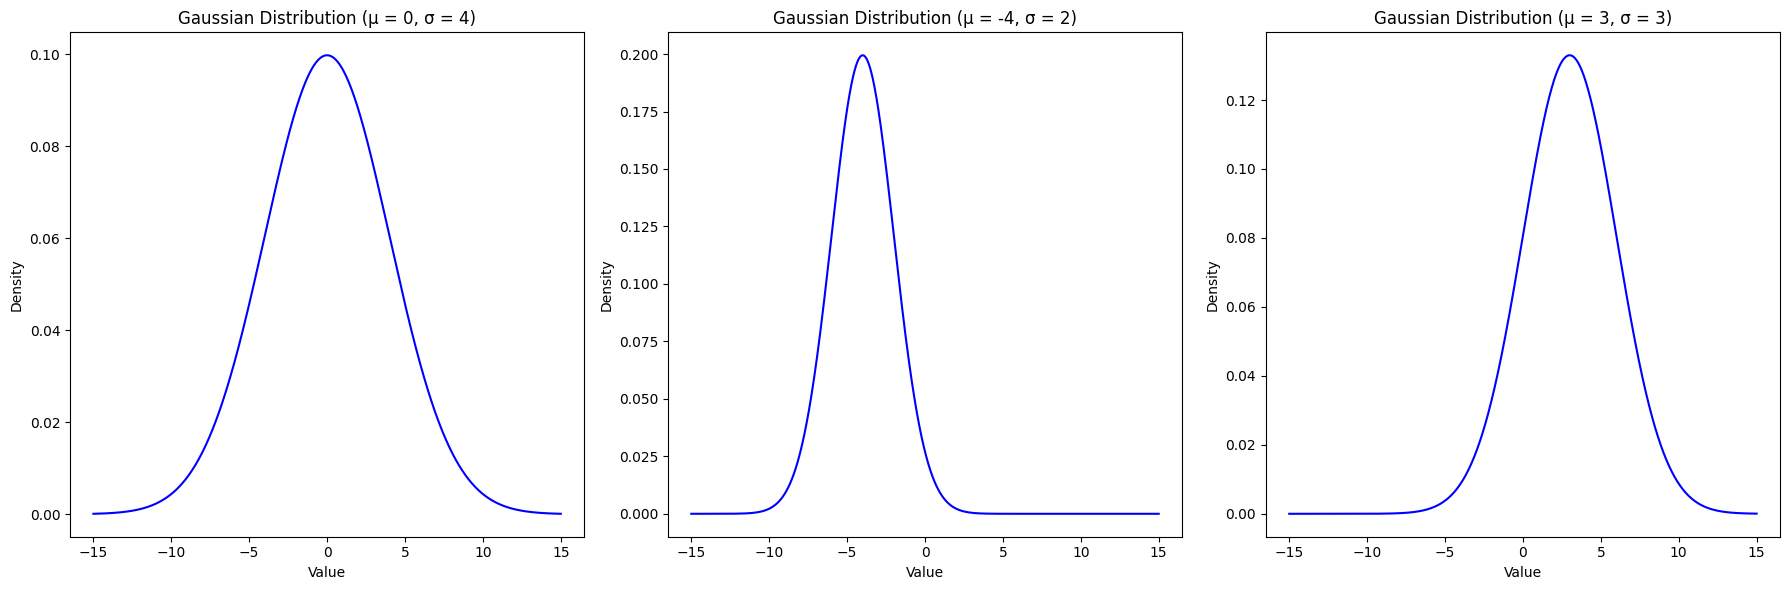

In [19]:
# Define the distributions to be plotted
mean_values = [0, -4, 3, ]
std_dev_values = [4, 2, 3]

# Create a new figure and set its size
fig, axs = plt.subplots(1, 3, figsize=(18,6))

# Generate a range of x values
x = np.linspace(-15, 15, 1000)

for i in range(3):
    # Create a Gaussian distribution for each subplot
    y = stats.norm.pdf(x, mean_values[i], std_dev_values[i])
    
    # Plot the Gaussian distribution on each subplot
    axs[i].plot(x, y, color='blue')
    
    # Set the title and labels for each subplot
    axs[i].set_title('Gaussian Distribution (μ = ' + str(mean_values[i]) + ', σ = ' + str(std_dev_values[i]) + ')')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


# Exponential and Laplace

Next, we consider the Exponentional and Laplace Discitributions. These are both distributions over the real numbers. They are useful for modeling positive real numbers. The Exponential distribution is defined as follows:

f(x;λ) = λ * exp(-λx) for x ≥ 0, 0 otherwise

λ is a positive real number called the rate parameter of the distribution. 
The expected value of the Exponential distribution is 1/λ and the variance is 1/λ^2.



The Laplace distribution is defined as follows:
Laplace(x;μ,λ) = 1/2λ * exp(-|x-μ|/λ)

μ is the location parameter and λ is the scale parameter. 
The expected value of the Laplace distribution is μ and the variance is 2/λ^2.

Both of these distributions are related in that they contain shap peaks around their expected values and decay rapidly as we move away from the expected value in either direction. This is useful for modeling quantities that are more likely to be near the expected value than far away from it.

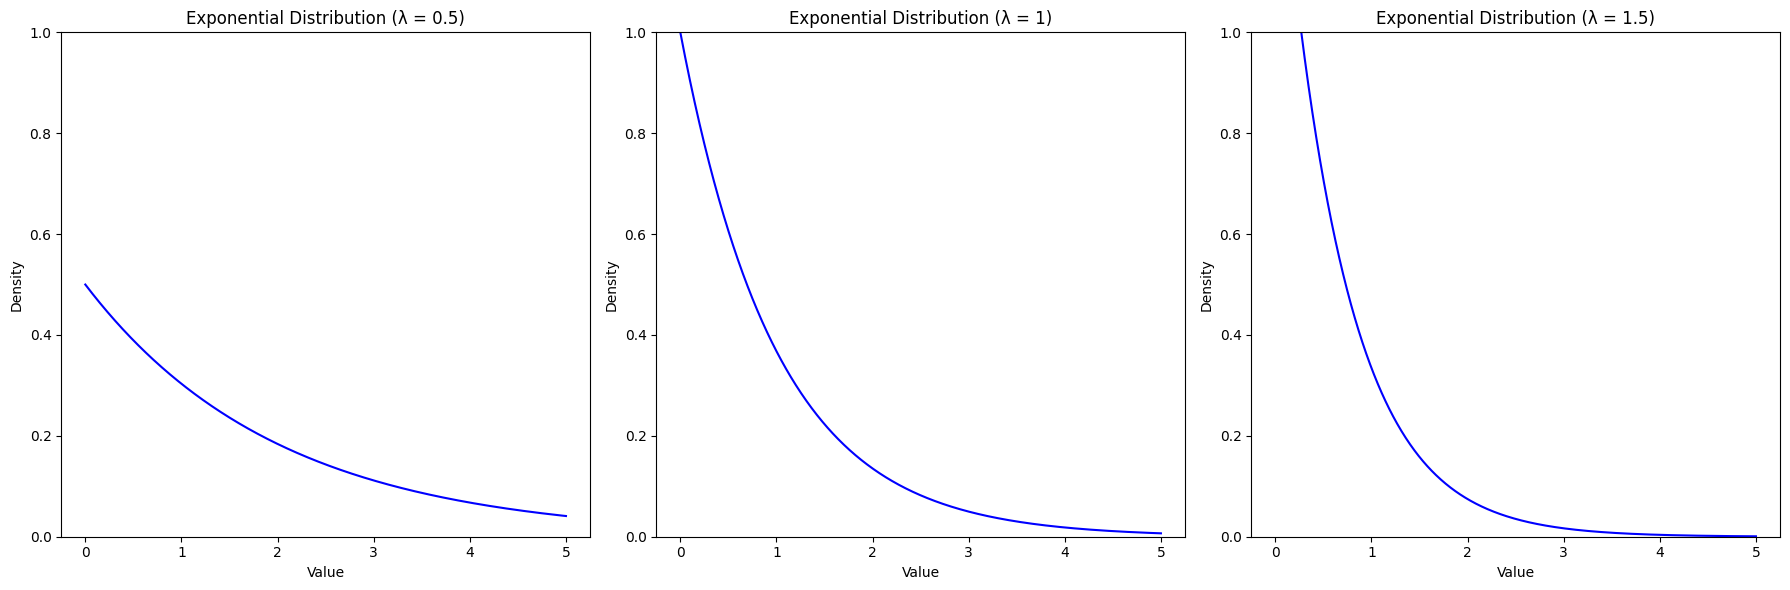

In [24]:
# Define the rate parameters for the exponential distributions
rate_parameters = [0.5, 1, 1.5]

# Create a new figure and set its size
fig, axs = plt.subplots(1, 3, figsize=(18,6))

# Generate a range of x values
x = np.linspace(0, 5, 1000)

for i in range(3):
    # Create an exponential distribution for each subplot
    y = stats.expon.pdf(x, scale=1/rate_parameters[i])

    # Plot the exponential distribution on each subplot
    axs[i].plot(x, y, color='blue')
    
    # Set the title and labels for each subplot
    axs[i].set_title('Exponential Distribution (λ = ' + str(rate_parameters[i]) + ')')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
    axs[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()


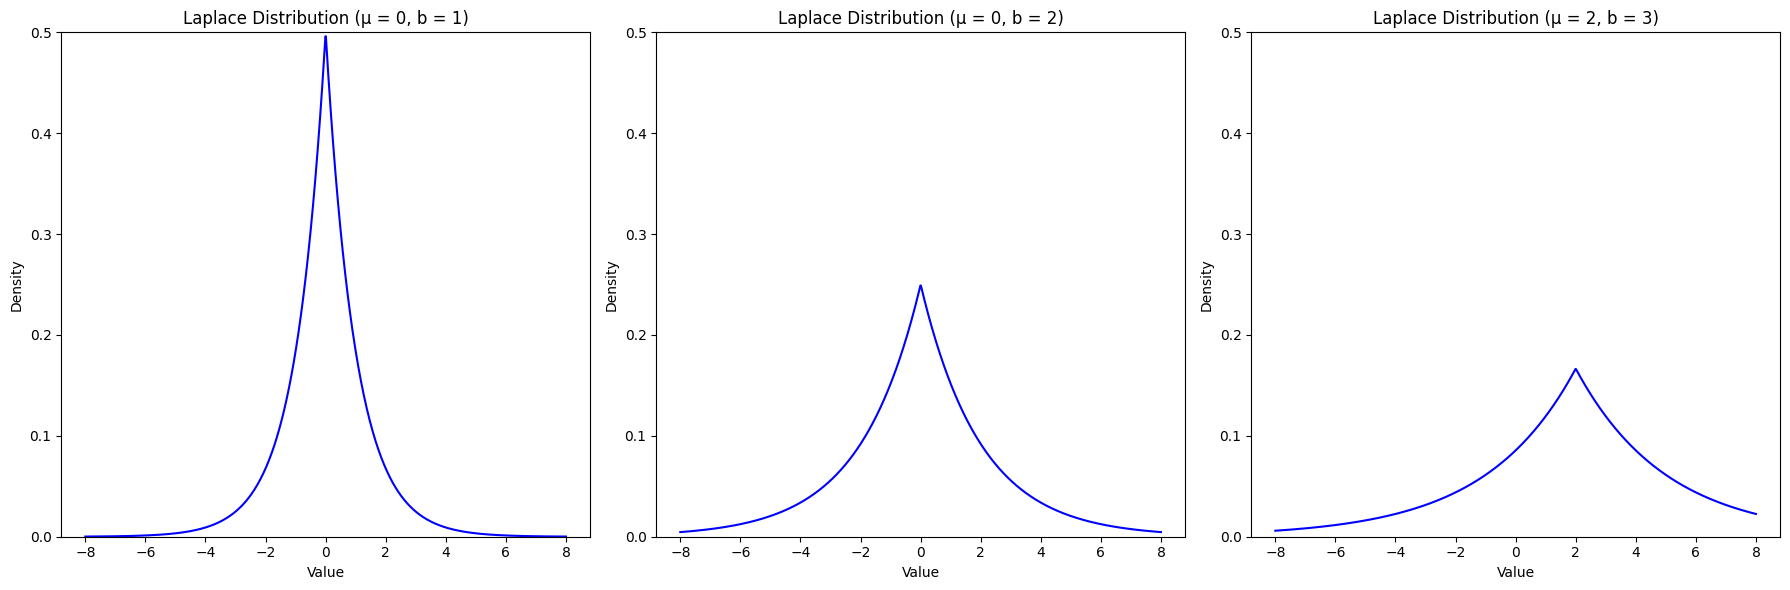

In [28]:
# Define the parameters for the Laplace distributions
# loc parameter defines the location (mean) of the peak
# scale parameter defines the exponential decay
params = [(0, 1), (0, 2), (2, 3)]

# Create a new figure and set its size
fig, axs = plt.subplots(1, 3, figsize=(18,6))

# Generate a range of x values
x = np.linspace(-8, 8, 1000)

for i in range(3):
    # Create a Laplace distribution for each subplot
    loc, scale = params[i]
    y = stats.laplace.pdf(x, loc=loc, scale=scale)

    # Plot the Laplace distribution on each subplot
    axs[i].plot(x, y, color='blue')
    
    # Set the title and labels for each subplot
    axs[i].set_title('Laplace Distribution (μ = ' + str(loc) + ', b = ' + str(scale) + ')')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
    set_ylim = axs[i].set_ylim([0, 0.5])

plt.tight_layout()
plt.show()


# Dirac and Empirical

Finally we will explore the Dirac Distribution and Empirical Distribution. The Dirac Distribution is a distribution that puts all of its probability mass on a single point. It is defined as follows:

P(x) = δ(x-μ)

δ is the Dirac delta function. It is not a function in the traditional sense, but rather a generalized function. This means that it is defined based on how it integrates. The Dirac delta function is 0 everywhere except 0, where it is infinite. When integrated over an interval that includes 0, the result is 1.

μ is the single point where all the probability mass is concentrated. The expected value of the Dirac distribution is μ and the variance is 0.

Because the Dirac delta function is infintely tall and narrow, we cannot plot it.

However, we can plot the empirical function which uses the dirac delta distribution as a component. The empirical distribution is defined as follows:

P(x) = (1 / m) * sum( δ(x - x^(i)) ) for i = 1,2,...,m

The empirical distribution is a histogram of the probability mass of the dirac delta function. It is a discrete distribution that puts probability mass 1/m on each of the m points x^(i). The expected value of the empirical distribution is the mean of the m points and the variance is the variance of the m points.


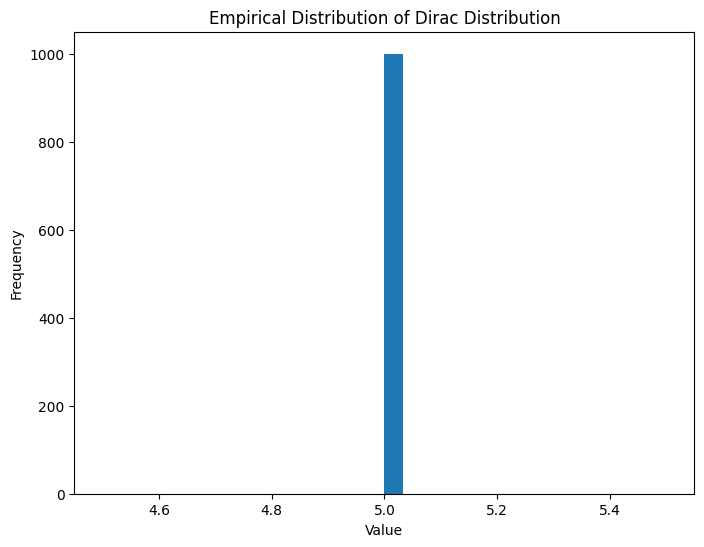

In [32]:
# Value where all probability mass is concentrated
mu = 5

# Number of samples
n_samples = 1000

# All samples are the same in a Dirac distribution
samples = np.full(n_samples, mu)

# Plot empirical distribution
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30)
plt.title('Empirical Distribution of Dirac Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In the above plot, all probability mass is clustered into a single point, visible with the histogram.

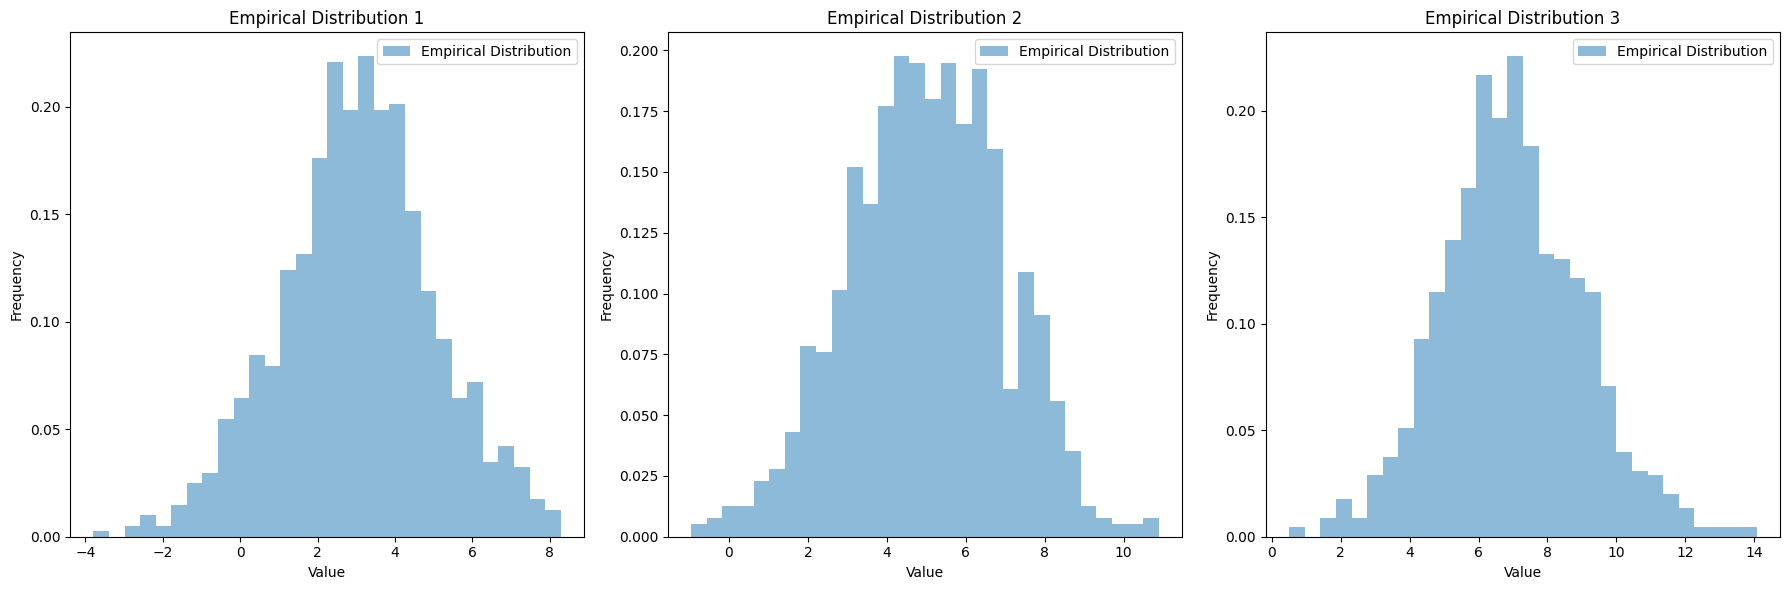

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(18,6))

# Create different Gaussian random datasets
datasets = [np.random.normal(loc=mu, scale=2, size=1000) for mu in [3, 5, 7]]

for i in range(3):
    # Plot empirical distribution for each dataset
    axs[i].hist(datasets[i], bins=30, density=True, cumulative=False, label='Empirical Distribution', alpha=0.5)
    axs[i].set_title('Empirical Distribution ' + str(i+1))
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

plt.tight_layout()
plt.show()


The dirac distribution is necessary for defining the emperical distribution over continuous variables. The emperical distribution is a discrete distribution that puts probability mass 1/m on each of the m points x^(i). The expected value of the emperical distribution is the mean of the m points and the variance is the variance of the m points.

The above plot is a plot of 3 sets of 1000 samples from gaussian distributions with means of 3, 5, and 7. All have std of 2.  
The "bins" are the number of discrete values that the histogram is divided into. The more bins, the more detail in the histogram. In other words, the bins represent intervals where their height is the number of samples that fall into that interval. Each datapoint in that interval, is a dirac distribution.